In [1]:
import numpy as np
import pandas as pd
import os
#print(os.listdir("../input"))

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50000,n_features=8,n_informative=8,n_redundant=0,n_clusters_per_class=2, random_state = 26)

In [3]:
print(type(X), type(y))
print(len(X[1]), X[1], y[1])
print("Shape : {}, {}".format(X.shape, y.shape))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
8 [-0.23437209  0.12602952 -2.28061075  3.10515421 -0.46080234 -0.48933043
 -2.25254839 -1.67103574] 1
Shape : (50000, 8), (50000,)


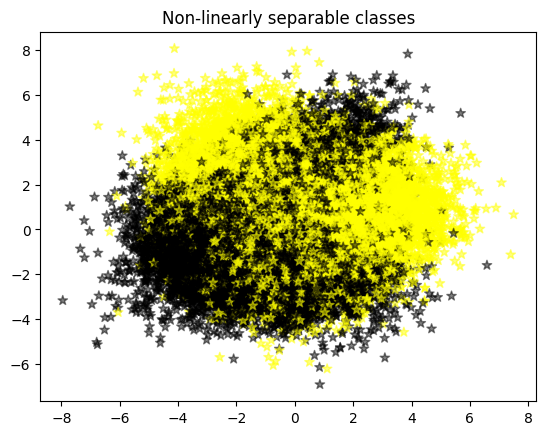

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors=['black','yellow']
cmap = matplotlib.colors.ListedColormap(colors)

#Plot the figure

plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,marker= '*', s=50, cmap=cmap, alpha = 0.5 )
plt.savefig('fig1.png', bbox_inches='tight')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25,random_state = 25)

print("shape of X_train:{} shape 0f Y_train:{}".format(X_train.shape, Y_train.shape))
print("shape of X_test:{} shape 0f Y_test:{}".format(X_test.shape, Y_test.shape))

shape of X_train:(37500, 8) shape 0f Y_train:(37500,)
shape of X_test:(12500, 8) shape 0f Y_test:(12500,)


In [6]:
X_train = X_train.T
Y_train = Y_train.reshape(1, len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1, len(Y_test))
print("shape of X_train:{} shape 0f Y_train:{} after transformation".format(X_train.shape, Y_train.shape))

shape of X_train:(8, 37500) shape 0f Y_train:(1, 37500) after transformation


In [7]:
import tensorflow as tf

def placeholders(num_features):

  A_0 = tf.compat.v1.placeholder(dtype = tf.float64, shape = ([num_features,None]))
  Y = tf.compat.v1.placeholder(dtype = tf.float64, shape = ([1,None]))

  return A_0,Y

In [9]:
import tensorflow as tf

# Disable eager execution
tf.compat.v1.disable_eager_execution()

ph = tf.compat.v1.placeholder(tf.float32)
ph
matph1 = tf.compat.v1.placeholder(tf.int32, shape=(3,3))
matph2 = tf.compat.v1.placeholder(tf.int32, shape=(None,3))
# None is for no. of rows or examples in dataset

print(matph1)
print(matph2)

Tensor("Placeholder_1:0", shape=(3, 3), dtype=int32)
Tensor("Placeholder_2:0", shape=(None, 3), dtype=int32)


In [10]:
def initialiseParameters(num_features, num_nodes):

  W1 = tf.Variable(initial_value=tf.random.normal([num_nodes,num_features], dtype = tf.float64) * 0.01)

  b1 = tf.Variable(initial_value=tf.zeros([num_nodes,1], dtype=tf.float64))

  W2 = tf.Variable(initial_value=tf.random.normal([1,num_nodes], dtype=tf.float64) * 0.01)

  b2 = tf.Variable(initial_value=tf.zeros([1,1], dtype=tf.float64))

  return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

In [11]:
def forward_propagation(A_0,parameters):

  Z1 = tf.matmul(parameters["W1"],A_0) + parameters["b1"]

  A1 = tf.nn.relu(Z1)

  Z2 = tf.matmul(parameters["W2"],A1) + parameters["b2"]

  return Z2

In [12]:
def shallow_model(X_train,Y_train,X_test,Y_test, num_nodes, learning_rate, num_iter):
  tf.compat.v1.disable_eager_execution()

  num_features = X_train.shape[0]

  A_0, Y = placeholders(num_features)


  parameters = initialiseParameters(num_features, num_nodes)

  Z2 = forward_propagation(A_0, parameters)

  cost = tf.compat.v1.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z2,labels=Y))

  train_net = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  init = tf.compat.v1.global_variables_initializer()



  with tf.compat.v1.Session() as sess:

    sess.run(init)

    for i in range(num_iter):

      _,c = sess.run([train_net, cost], feed_dict={A_0: X_train, Y: Y_train})

      if i % 1000 == 0:

        print(c)

    correct_prediction = tf.compat.v1.equal(tf.compat.v1.round(tf.sigmoid(Z2)), Y)

    # Calculate accuracy

    accuracy = tf.compat.v1.reduce_mean(tf.compat.v1.cast(correct_prediction, "float"))

    print("Accuracy on test set:", accuracy.eval({A_0: X_test, Y: Y_test}))

In [14]:
shallow_model(X_train, Y_train, X_test, Y_test, 8, 0.2, 1)

0.6931028922546688
Accuracy on test set: 0.53224
